# Solar Panel Generation Analysis <a id='back'></a>

## Table of Contents
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Data Wrangling](#data-wrangling)
        - [Header Style](#header-style)
        - [Formatting and Data Usage](#formatting-and-data-usage)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

[project intro]

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing file for assignment
try:
    pg_1 = pd.read_csv('Plant_1_Generation_Data.csv', sep=',')
except:
    pg_1 = pd.read_csv('/datasets/Plant_1_Generation_Data.csv', sep=',')

try:
    ws_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv', sep=',')
except:
    ws_1 = pd.read_csv('/datasets/Plant_1_Weather_Sensor_Data.csv', sep=',')

try:
    pg_2 = pd.read_csv('Plant_2_Generation_Data.csv', sep=',')
except:
    pg_2 = pd.read_csv('/datasets/Plant_2_Generation_Data.csv', sep=',')

try:
    ws_2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv', sep=',')
except:
    ws_2 = pd.read_csv('/datasets/Plant_2_Weather_Sensor_Data.csv', sep=',')

[Back to Table of Contents](#back)

## Pre-Processing Data

### Data Wrangling

#### Header Style

In [3]:
# Getting general information about the dataset
pg_1.info()
pg_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
#checking for snakecase format
pg_1.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [5]:
# Renaming column names to snake_case format
pg_1 = pg_1.rename(columns={'DATE_TIME': 'date_time',
                            'PLANT_ID': 'plant_id',
                            'SOURCE_KEY': 'source_key',
                            'DC_POWER': 'dc_power',
                            'AC_POWER': 'ac_power',
                            'DAILY_YIELD': 'daily_yield',
                            'TOTAL_YIELD': 'total_yield'})
pg_1.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

In [6]:
# Getting general information about the dataset
ws_1.info()
ws_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [7]:
#checking for snakecase format
ws_1.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

In [8]:
# Renaming column names to snake_case format
ws_1 = ws_1.rename(columns={'DATE_TIME': 'date_time',
                            'PLANT_ID': 'plant_id',
                            'SOURCE_KEY': 'source_key',
                            'AMBIENT_TEMPERATURE': 'ambient_temp',
                            'MODULE_TEMPERATURE': 'module_temp',
                            'IRRADIATION': 'irradiation'})
ws_1.columns

Index(['date_time', 'plant_id', 'source_key', 'ambient_temp', 'module_temp',
       'irradiation'],
      dtype='object')

In [9]:
# Getting general information about the dataset
pg_2.info()
pg_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [10]:
#checking for snakecase format
pg_2.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [11]:
# Renaming column names to snake_case format
pg_2 = pg_2.rename(columns={'DATE_TIME': 'date_time',
                            'PLANT_ID': 'plant_id',
                            'SOURCE_KEY': 'source_key',
                            'DC_POWER': 'dc_power',
                            'AC_POWER': 'ac_power',
                            'DAILY_YIELD': 'daily_yield',
                            'TOTAL_YIELD': 'total_yield'})
pg_2.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

In [12]:
# Getting general information about the dataset
ws_2.info()
ws_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [13]:
#checking for snakecase format
ws_2.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

In [14]:
# Renaming column names to snake_case format
ws_2 = ws_2.rename(columns={'DATE_TIME': 'date_time',
                            'PLANT_ID': 'plant_id',
                            'SOURCE_KEY': 'source_key',
                            'AMBIENT_TEMPERATURE': 'ambient_temp',
                            'MODULE_TEMPERATURE': 'module_temp',
                            'IRRADIATION': 'irradiation'})
ws_2.columns

Index(['date_time', 'plant_id', 'source_key', 'ambient_temp', 'module_temp',
       'irradiation'],
      dtype='object')

[Back to Table of Contents](#back)

#### Formatting and Data Usage

In [15]:
pg_1.info()
pg_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_time    68778 non-null  object 
 1   plant_id     68778 non-null  int64  
 2   source_key   68778 non-null  object 
 3   dc_power     68778 non-null  float64
 4   ac_power     68778 non-null  float64
 5   daily_yield  68778 non-null  float64
 6   total_yield  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [16]:
pg_1['source_key'].nunique()

22

In [17]:
pg_1['date_time'] = pd.to_datetime(pg_1['date_time'], format='%d-%m-%Y %H:%M')
pg_1['source_key'] = pg_1['source_key'].str.lower()
pg_1['source_key'] = pg_1['source_key'].astype('category')
pg_1.info()
print(pg_1['source_key'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    68778 non-null  datetime64[ns]
 1   plant_id     68778 non-null  int64         
 2   source_key   68778 non-null  category      
 3   dc_power     68778 non-null  float64       
 4   ac_power     68778 non-null  float64       
 5   daily_yield  68778 non-null  float64       
 6   total_yield  68778 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 3.2 MB
22


In [18]:
ws_1.info()
ws_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_time     3182 non-null   object 
 1   plant_id      3182 non-null   int64  
 2   source_key    3182 non-null   object 
 3   ambient_temp  3182 non-null   float64
 4   module_temp   3182 non-null   float64
 5   irradiation   3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


,date_time,plant_id,source_key,ambient_temp,module_temp,irradiation
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [19]:
ws_1['source_key'].nunique()

1

In [20]:
ws_1['date_time'] = pd.to_datetime(ws_1['date_time'], format='%Y-%m-%d %H:%M:%S')
ws_1['source_key'] = ws_1['source_key'].str.lower()
ws_1['source_key'] = ws_1['source_key'].astype('category')
ws_1.info()
ws_1['source_key'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_time     3182 non-null   datetime64[ns]
 1   plant_id      3182 non-null   int64         
 2   source_key    3182 non-null   category      
 3   ambient_temp  3182 non-null   float64       
 4   module_temp   3182 non-null   float64       
 5   irradiation   3182 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 127.6 KB


1

In [21]:
pg_2.info()
pg_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_time    67698 non-null  object 
 1   plant_id     67698 non-null  int64  
 2   source_key   67698 non-null  object 
 3   dc_power     67698 non-null  float64
 4   ac_power     67698 non-null  float64
 5   daily_yield  67698 non-null  float64
 6   total_yield  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [22]:
pg_2['source_key'].nunique()

22

In [23]:
pg_2['date_time'] = pd.to_datetime(pg_2['date_time'], format='%Y-%m-%d %H:%M:%S')
pg_2['source_key'] = pg_2['source_key'].str.lower()
pg_2['source_key'] = pg_2['source_key'].astype('category')
pg_2.info()
pg_2['source_key'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    67698 non-null  datetime64[ns]
 1   plant_id     67698 non-null  int64         
 2   source_key   67698 non-null  category      
 3   dc_power     67698 non-null  float64       
 4   ac_power     67698 non-null  float64       
 5   daily_yield  67698 non-null  float64       
 6   total_yield  67698 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 3.2 MB


22

In [24]:
ws_2['source_key'].nunique()

1

In [25]:
ws_2['date_time'] = pd.to_datetime(ws_2['date_time'], format='%Y-%m-%d %H:%M:%S')
ws_2['source_key'] = ws_2['source_key'].str.lower()
ws_2['source_key'] = ws_2['source_key'].astype('category')
ws_2.info()
ws_2['source_key'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_time     3259 non-null   datetime64[ns]
 1   plant_id      3259 non-null   int64         
 2   source_key    3259 non-null   category      
 3   ambient_temp  3259 non-null   float64       
 4   module_temp   3259 non-null   float64       
 5   irradiation   3259 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 130.7 KB


1

[Back to Table of Contents](#back)

### Duplicates

In [26]:
# Checking for duplicates
pg_1.duplicated().sum()

0

In [27]:
# Checking for duplicates
ws_1.duplicated().sum()

0

In [28]:
# Checking for duplicates
pg_2.duplicated().sum()

0

In [29]:
# Checking for duplicates
ws_2.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [30]:
# Checking for null values
pg_1.isna().sum()

date_time      0
plant_id       0
source_key     0
dc_power       0
ac_power       0
daily_yield    0
total_yield    0
dtype: int64

In [31]:
# Checking for null values
ws_1.isna().sum()

date_time       0
plant_id        0
source_key      0
ambient_temp    0
module_temp     0
irradiation     0
dtype: int64

In [32]:
# Checking for null values
pg_2.isna().sum()

date_time      0
plant_id       0
source_key     0
dc_power       0
ac_power       0
daily_yield    0
total_yield    0
dtype: int64

In [33]:
# Checking for null values
ws_2.isna().sum()

date_time       0
plant_id        0
source_key      0
ambient_temp    0
module_temp     0
irradiation     0
dtype: int64

[Back to Table of Contents](#back)

## Exploratory Data Analysis

In [34]:
pg_1['date'] = pg_1['date_time'].dt.date
pg_1['date'] = pd.to_datetime(pg_1['date'], format='%Y-%m-%d')
pg_1['hour'] = pg_1['date_time'].dt.hour
pg_1['day'] = pg_1['date_time'].dt.weekday
pg_1['week'] = pg_1['date_time'].dt.isocalendar().week
pg_1['month'] = pg_1['date_time'].dt.month
pg_1.info()
pg_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    68778 non-null  datetime64[ns]
 1   plant_id     68778 non-null  int64         
 2   source_key   68778 non-null  category      
 3   dc_power     68778 non-null  float64       
 4   ac_power     68778 non-null  float64       
 5   daily_yield  68778 non-null  float64       
 6   total_yield  68778 non-null  float64       
 7   date         68778 non-null  datetime64[ns]
 8   hour         68778 non-null  int64         
 9   day          68778 non-null  int64         
 10  week         68778 non-null  UInt32        
 11  month        68778 non-null  int64         
dtypes: UInt32(1), category(1), datetime64[ns](2), float64(4), int64(4)
memory usage: 5.6 MB


,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,date,hour,day,week,month
0,2020-05-15,4135001,1by6weclgh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,0,4,20,5
1,2020-05-15,4135001,1if53ai7xc0u56y,0.0,0.0,0.0,6183645.0,2020-05-15,0,4,20,5
2,2020-05-15,4135001,3pzuobaid5wc2hd,0.0,0.0,0.0,6987759.0,2020-05-15,0,4,20,5
3,2020-05-15,4135001,7jydwkrlspkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,0,4,20,5
4,2020-05-15,4135001,mcde0feggrqw7ca,0.0,0.0,0.0,7158964.0,2020-05-15,0,4,20,5


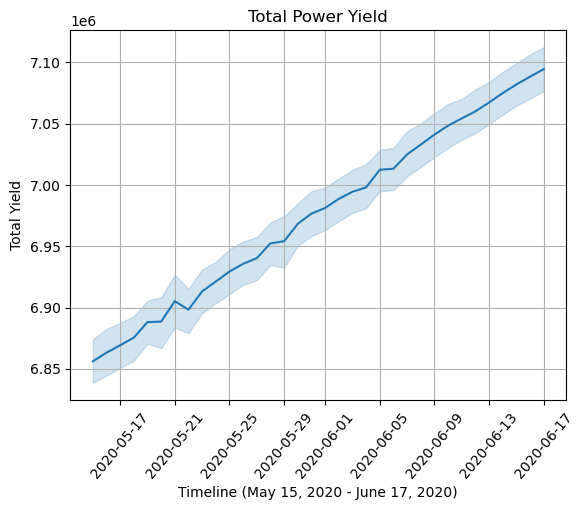

In [35]:
sns.lineplot(data=pg_1,
             x='date',
             y='total_yield')

plt.title('Total Power Yield')
plt.xlabel('Timeline (May 15, 2020 - June 17, 2020)')
plt.xticks(rotation=50)
plt.ylabel('Total Yield')

plt.grid()
plt.show()

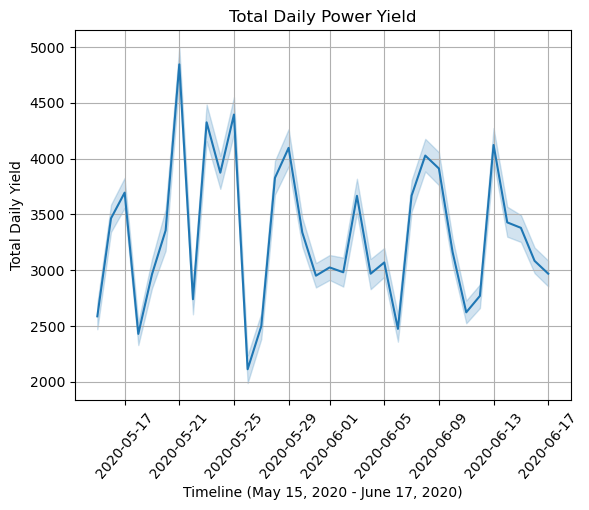

In [36]:
sns.lineplot(data=pg_1,
             x='date',
             y='daily_yield')

plt.title('Total Daily Power Yield')
plt.xlabel('Timeline (May 15, 2020 - June 17, 2020)')
plt.xticks(rotation=50)
plt.ylabel('Total Daily Yield')

plt.grid()
plt.show()

<Axes: xlabel='date'>

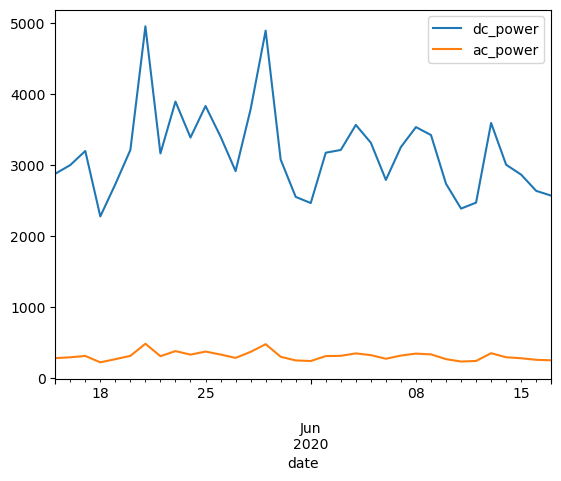

In [37]:
pg_1.groupby('date').agg({'dc_power': 'mean',
                          'ac_power': 'mean'}).round(3).plot(kind='line')

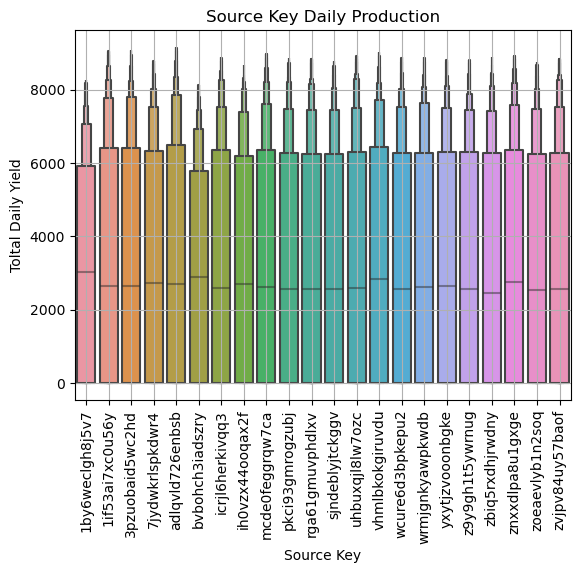

In [38]:
sns.boxenplot(data=pg_1,
              x='source_key',
              y='daily_yield')

plt.title('Source Key Daily Production')
plt.xlabel('Source Key')
plt.xticks(rotation=90)
plt.ylabel('Toltal Daily Yield')

plt.grid()
plt.show()

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

Ani Kannal. (2020, May). Solar Power Generation Data, Version 1. Retrieved May 15, 2024 from [Kaggle](https://www.kaggle.com/datasets/anikannal/solar-power-generation-data?select=Plant_1_Weather_Sensor_Data.csv).

[Back to Table of Contents](#back)